In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

import random

from sys import path
path.append("..")
from iads.vectorization import normalize, get_tfidf_vect, get_bow_vect
from iads.preprocessing import clean_news, get_corpus, lemmatize_filter
import iads.clustering_eval as ce


sns.set_theme()
plt.rcParams['font.family'] = 'Proxima Nova'


In [2]:
newsgroups_df = pd.read_csv("data/sample.csv")
stop_words_df = pd.read_csv("data/stopwords.csv")
stopwords = stop_words_df["stopword"].values.tolist()

news_no_stopwords = clean_news(newsgroups_df, stopwords, True, True)
news_no_stopwords = lemmatize_filter(news_no_stopwords, 3, 10)
corpus = get_corpus(news_no_stopwords)
news_no_stopwords

Number of Nans 48


,Message index,target,label,messages
0,0,0,alt.atheism,law seem value criminal life victim life islam...
1,1,0,alt.atheism,com bill newsgroups alt atheism organization s...
2,2,0,alt.atheism,true believer die belief jesus jim jones well ...
3,3,0,alt.atheism,knowing keith expect bring better oil well dry
4,4,0,alt.atheism,film medium alternative movie source may book ...
...,...,...,...,...
1810,1879,19,comp.os.ms-windows.misc,think mistaken thinking tom atheist find athei...
1811,1881,19,comp.os.ms-windows.misc,would religious belief therefore feel comforta...
1812,1882,19,comp.os.ms-windows.misc,extremely good example evidence every time rig...
1813,1883,19,comp.os.ms-windows.misc,vol part ocean translation turkish writing sai...


## Classification

### Bag-of-words binaire

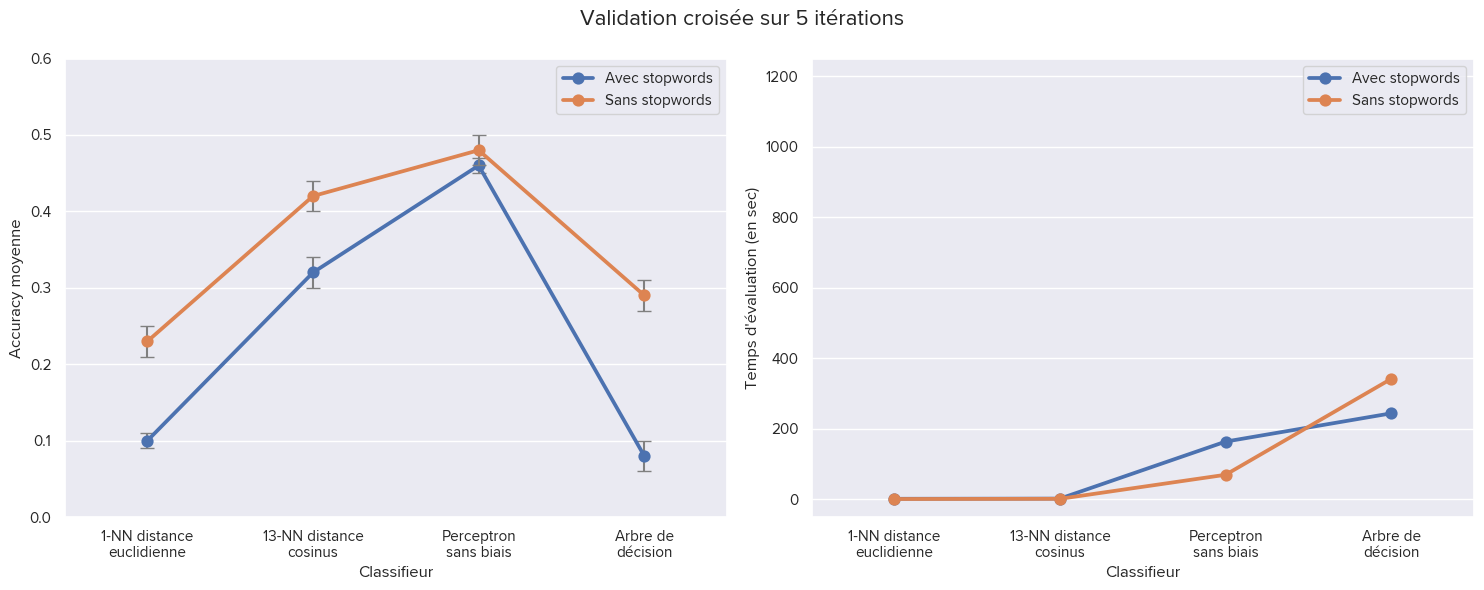

In [23]:
classifiers = ["1-NN distance\neuclidienne", "13-NN distance\ncosinus", "Perceptron\nsans biais", "Arbre de\ndécision"]
data_sw=pd.DataFrame(data={"mean":[0.10, 0.32, 0.46, 0.08],
                           "std":[0.01, 0.02, 0.01, 0.02],
                           "time":[1.76, 2.28, 163.91, 244.05],
                           "Classifieur":classifiers})
data_no_sw=pd.DataFrame(data={"mean":[0.23, 0.42, 0.48, 0.29],
                              "std":[0.02, 0.02, 0.02, 0.02],
                              "time":[1.13, 1.72, 69.88, 341.74],
                              "Classifieur":classifiers})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.errorbar(x=range(len(data_sw)), y=data_sw["mean"], yerr=data_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_sw, x="Classifieur", y="mean", label="Avec stopwords", ax=ax1)

ax1.errorbar(x=range(len(data_no_sw)), y=data_no_sw["mean"], yerr=data_no_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_no_sw, x="Classifieur", y="mean", label="Sans stopwords", ax=ax1)

ax1.set_ylim(0., 0.6)
ax1.set_ylabel("Accuracy moyenne")

sns.pointplot(data=data_sw, x="Classifieur", y="time", label="Avec stopwords", ax=ax2)
sns.pointplot(data=data_no_sw, x="Classifieur", y="time", label="Sans stopwords", ax=ax2)

ax2.set_ylabel("Temps d'évaluation (en sec)")
ax2.set_ylim(-50, 1250)

fig.suptitle("Validation croisée sur 5 itérations", fontsize=16)
plt.tight_layout()
plt.legend()

fig.savefig("images/bow_bin_eval.svg", dpi=150,  bbox_inches='tight', format="svg")

### Bag-of-words non binaire

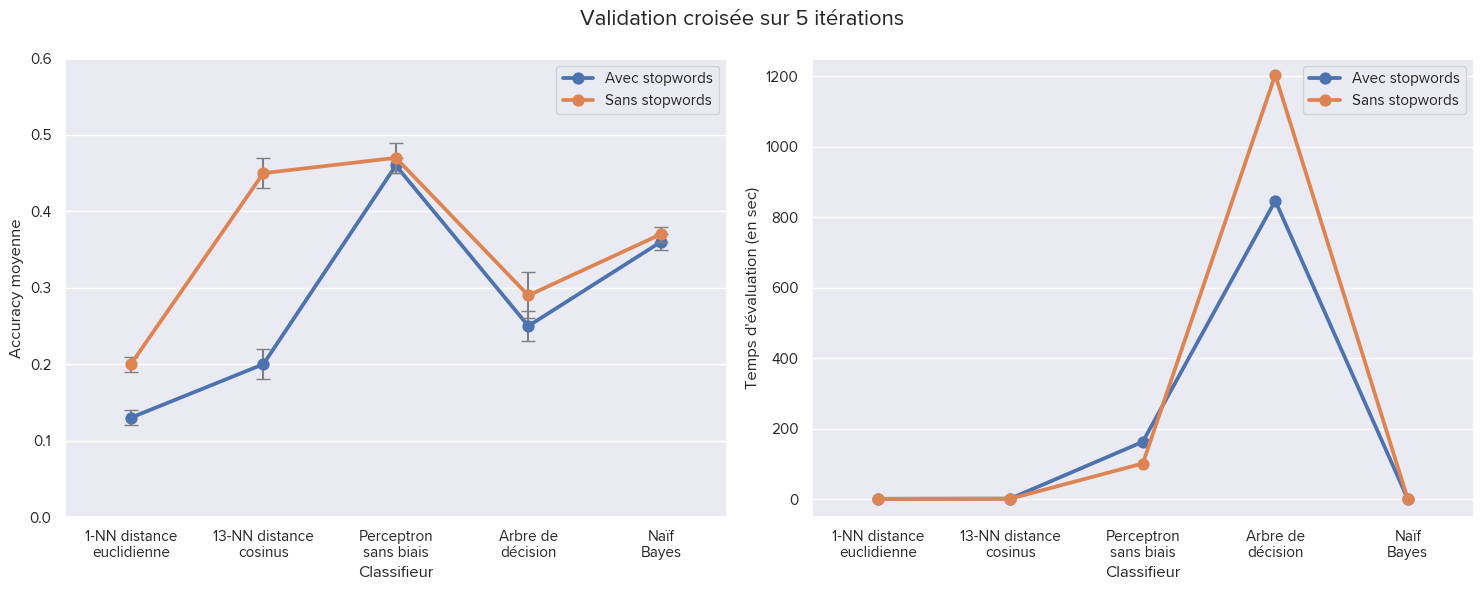

In [24]:
classifiers = ["1-NN distance\neuclidienne", "13-NN distance\ncosinus", "Perceptron\nsans biais", "Arbre de\ndécision", "Naïf\nBayes"]
data_sw=pd.DataFrame(data={"mean":[0.13, 0.20, 0.46, 0.25, 0.36],
                           "std":[0.01, 0.02, 0.01, 0.02, 0.01],
                           "time":[1.72, 2.25, 163.30, 846.61, 1.26],
                           "Classifieur":classifiers})
data_no_sw=pd.DataFrame(data={"mean":[0.20, 0.45, 0.47, 0.29, 0.37],
                              "std":[0.01, 0.02, 0.02, 0.03, 0.01],
                              "time":[1.61, 1.97, 101.80, 1203.66, 1.16],
                              "Classifieur":classifiers})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.errorbar(x=range(len(data_sw)), y=data_sw["mean"], yerr=data_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_sw, x="Classifieur", y="mean", label="Avec stopwords", ax=ax1)

ax1.errorbar(x=range(len(data_no_sw)), y=data_no_sw["mean"], yerr=data_no_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_no_sw, x="Classifieur", y="mean", label="Sans stopwords", ax=ax1)

ax1.set_ylim(0., 0.6)
ax1.set_ylabel("Accuracy moyenne")

sns.pointplot(data=data_sw, x="Classifieur", y="time", label="Avec stopwords", ax=ax2)
sns.pointplot(data=data_no_sw, x="Classifieur", y="time", label="Sans stopwords", ax=ax2)

ax2.set_ylabel("Temps d'évaluation (en sec)")
ax2.set_ylim(-50, 1250)

fig.suptitle("Validation croisée sur 5 itérations", fontsize=16)
plt.tight_layout()
plt.legend()

fig.savefig("images/bow_non_bin_eval.svg", dpi=150,  bbox_inches='tight', format="svg")

### Tf-Idf

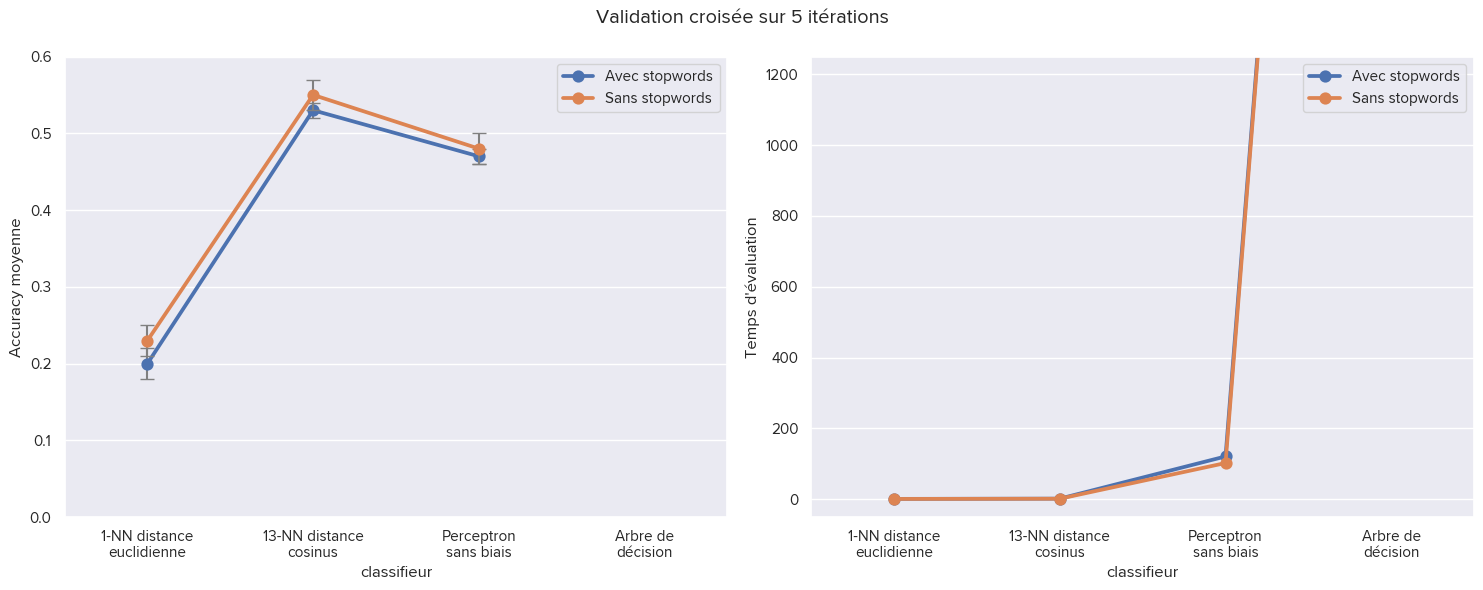

In [ ]:
classifiers = ["1-NN distance\neuclidienne", "13-NN distance\ncosinus", "Perceptron\nsans biais", "Arbre de\ndécision"]
data_sw=pd.DataFrame(data={"mean":[0.20, 0.53, 0.47, np.nan],
                           "std":[0.02, 0.01, 0.01, np.nan],
                           "time":[1.27, 1.97, 121.11, 6000],
                           "classifieur":classifiers})
data_no_sw=pd.DataFrame(data={"mean":[0.23, 0.55, 0.48, np.nan],
                              "std":[0.02, 0.02, 0.02, np.nan],
                              "time":[1.15, 1.75, 102.54, 6000],
                              "classifieur":classifiers})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.errorbar(x=range(len(data_sw)), y=data_sw["mean"], yerr=data_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_sw, x="classifieur", y="mean", label="Avec stopwords", ax=ax1)

ax1.errorbar(x=range(len(data_no_sw)), y=data_no_sw["mean"], yerr=data_no_sw['std'], fmt='none', capsize=5, color="gray")
sns.pointplot(data=data_no_sw, x="classifieur", y="mean", label="Sans stopwords", ax=ax1)

ax1.set_ylim(0., 0.6)
ax1.set_ylabel("Accuracy moyenne")

sns.pointplot(data=data_sw, x="classifieur", y="time", label="Avec stopwords", ax=ax2)
sns.pointplot(data=data_no_sw, x="classifieur", y="time", label="Sans stopwords", ax=ax2)

ax2.set_ylabel("Temps d'évaluation (en sec)")
ax2.set_ylim(-50, 1250)

fig.suptitle("Validation croisée sur 5 itérations")
plt.tight_layout()
plt.legend()

fig.savefig("images/tfidf_eval.svg", dpi=150,  bbox_inches='tight', format="svg")

## Fléau de la dimension

In [3]:
bow_bin_pca, bow_non_bin_pca, tfidf_pca = 1132, 1109, 1249

### Bag-of-words binaire

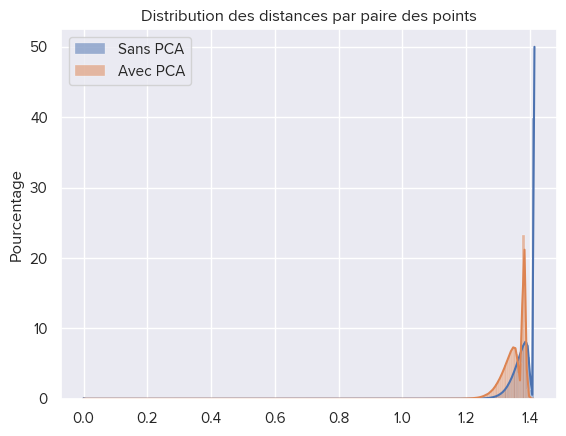

In [18]:
# Sans PCA
news_desc = normalize(get_bow_vect(news_no_stopwords, corpus, binary=True))
distances = pairwise_distances(news_desc).flatten()

fig, ax = plt.subplots(1, 1)
sns.histplot(distances, ax = ax, bins=200, kde=True, stat="percent", label="Sans PCA")

# Avec PCA
m_pca = PCA(n_components=bow_bin_pca, random_state=1).fit_transform(news_desc)

distances = pairwise_distances(m_pca)
np.fill_diagonal(distances, np.nan)
distances = distances.flatten()

sns.histplot(distances, ax=ax, bins=200, kde=True, stat="percent", label="Avec PCA")
ax.set_title("Distribution des distances par paire des points")
ax.set_ylabel("Pourcentage")
ax.legend()

plt.savefig("images/no_sw/bow_bin_distances_distr.svg", dpi=150, bbox_inches='tight', format="svg")

### Bag of words non binaire

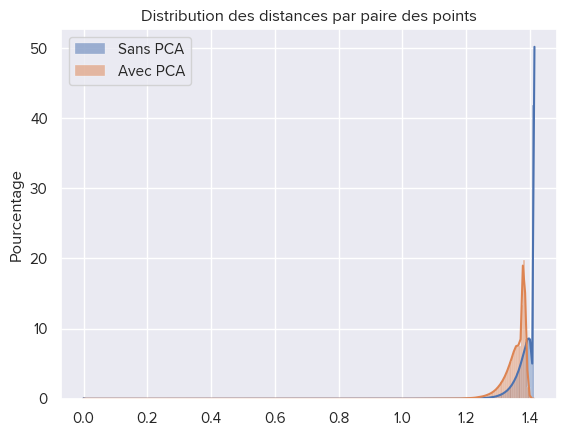

In [19]:
# Sans PCA
news_desc = normalize(get_bow_vect(news_no_stopwords, corpus, binary=False))
distances = pairwise_distances(news_desc).flatten()

fig, ax = plt.subplots(1, 1)
sns.histplot(distances, ax = ax, bins=200, kde=True, stat="percent", label="Sans PCA")

# Avec PCA
m_pca = PCA(n_components=bow_non_bin_pca, random_state=1).fit_transform(news_desc)

distances = pairwise_distances(m_pca)
np.fill_diagonal(distances, np.nan)
distances = distances.flatten()

sns.histplot(distances, ax=ax, bins=200, kde=True, stat="percent", label="Avec PCA")
ax.set_title("Distribution des distances par paire des points")
ax.set_ylabel("Pourcentage")
ax.legend()

plt.savefig("images/no_sw/bow_non_bin_distances_distr.svg", dpi=150, bbox_inches='tight', format="svg")

### Tf-Idf

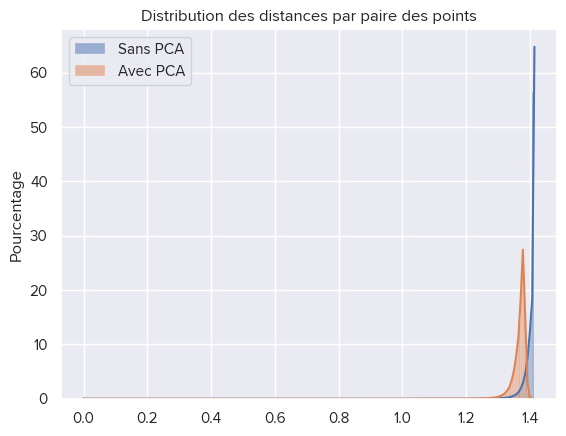

In [20]:
# Sans PCA
news_desc = normalize(get_tfidf_vect(news_no_stopwords, corpus))
distances = pairwise_distances(news_desc).flatten()

fig, ax = plt.subplots(1, 1)
sns.histplot(distances, ax = ax, bins=200, kde=True, stat="percent", label="Sans PCA")

# Avec PCA
m_pca = PCA(n_components=tfidf_pca, random_state=1).fit_transform(news_desc)

distances = pairwise_distances(m_pca)
np.fill_diagonal(distances, np.nan)
distances = distances.flatten()

sns.histplot(distances, ax=ax, bins=200, kde=True, stat="percent", label="Avec PCA")
ax.set_title("Distribution des distances par paire des points")
ax.set_ylabel("Pourcentage")
ax.legend()

plt.savefig("images/no_sw/tfidf_distances_distr.svg", bbox_inches='tight', format="svg")

### Séparation des images de recherche de k pour k-means

In [77]:
# Rédefinition de la fonction car coupure est nécessaire pour poster
def scores_plot(k_values, k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index):
    # affichage des résultats

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 6))

    fig.suptitle("Évolution des métriques en fonction de K",  y=0.95, fontsize=14)

    # Plot 1
    data = pd.DataFrame(data={"k": k_values, "Inertie globale": k_global_inertia,
                        "Séparabilité": k_separability, "Co-distance": k_co_dist})
    data = data.melt(id_vars="k", value_vars=["Inertie globale", "Séparabilité", "Co-distance"],
                     var_name="Métrique", value_name="Valeur de métrique")
    
    sns.lineplot(data=data[data["Métrique"] != "Séparabilité"], x="k", y="Valeur de métrique", hue="Métrique", ax=ax1)
    sns.lineplot(data=data[data["Métrique"] == "Séparabilité"], x="k", y="Valeur de métrique", hue="Métrique", ax=ax2)

    ax1.legend(loc="upper left", frameon=False)
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax1.set_xticklabels([])
    ax1.set_title("Compacité")


    ax2.set_xlabel("")
    ax2.set_title("Séparabilité")
    ax2.set_xticklabels([])
    ax2.legend_.remove()

    # Plot 2 : Indice de Dunn
    data = pd.DataFrame(data={"k": k_values,
                        "Indice de Xie-Beni": k_XB_index, "Indice de Dunn": k_Dunn_index})
    data = data.melt(id_vars="k", value_vars=["Indice de Dunn", "Indice de Xie-Beni"],
                     var_name="Métrique", value_name="Valeur de métrique")
    sns.lineplot(data=data, x="k", y="Valeur de métrique", hue="Métrique", ax=ax3)

    ax3.set_xlabel("Nombre de clusters (k)")
    ax3.set_ylabel("")
    ax3.set_title("Indices")
    ax3.legend(loc="lower left", frameon=False)

    plt.tight_layout()
    
    return fig


### Bag-of-words binaire

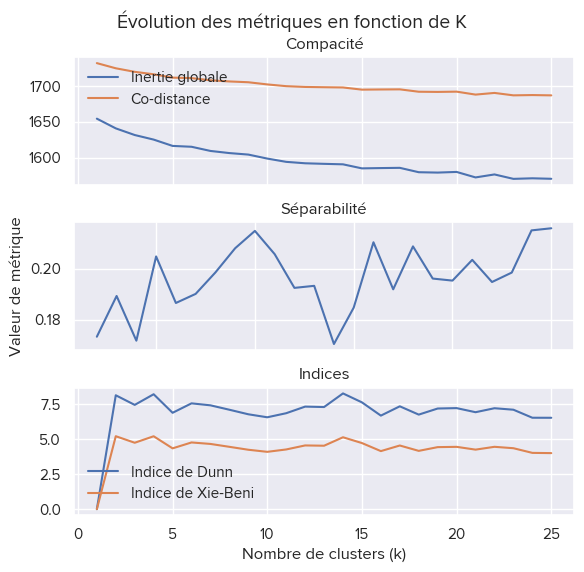

In [78]:
random.seed(1)
np.random.seed(1)

news_desc = normalize(get_bow_vect(news_no_stopwords, corpus, binary=True))
m_pca = PCA(n_components=bow_bin_pca, random_state=1).fit_transform(news_desc)
k_values, k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index = ce.variation_k_evalution(m_pca)
fig1 = scores_plot(k_values, k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index)
fig1.savefig("images/no_sw/kmeans_clusters/bow_bin_metrics1.svg", bbox_inches='tight', format="svg")

### Bag-of-words non binaire

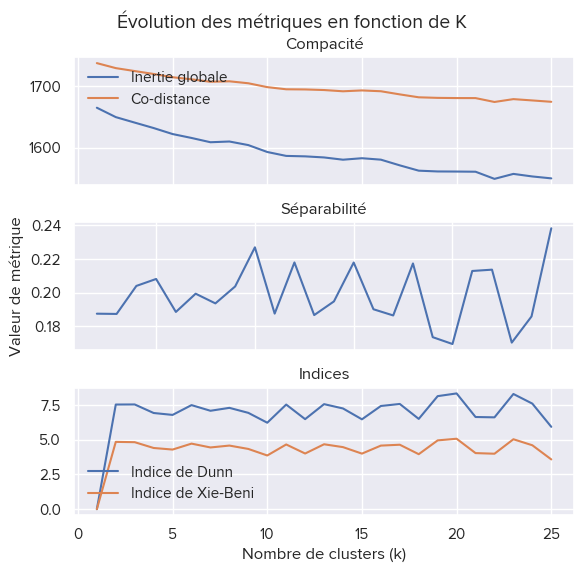

In [79]:
random.seed(1)
np.random.seed(1)
news_desc = normalize(get_bow_vect(news_no_stopwords, corpus, binary=False))
m_pca = PCA(n_components=bow_non_bin_pca, random_state=1).fit_transform(news_desc)
k_values, k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index = ce.variation_k_evalution(m_pca)
fig1 = scores_plot(k_values, k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index)

fig1.savefig("images/no_sw/kmeans_clusters/bow_non_bin_metrics1.svg", bbox_inches='tight', format="svg")

### Tf-Idf

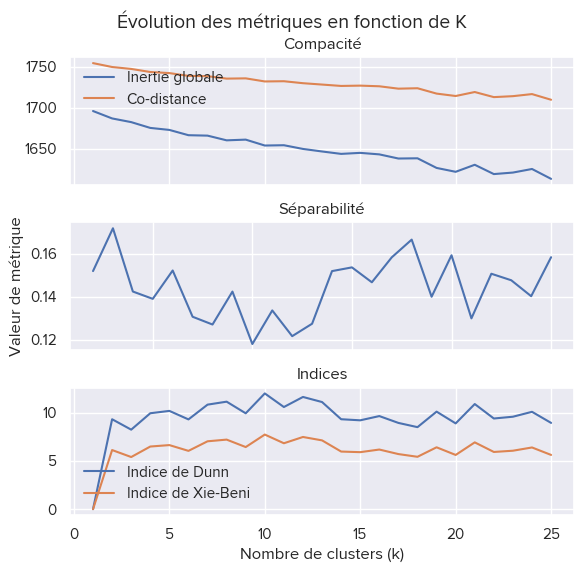

In [80]:
random.seed(1)
np.random.seed(1)
news_desc = normalize(get_tfidf_vect(news_no_stopwords, corpus))
m_pca = PCA(n_components=tfidf_pca, random_state=1).fit_transform(news_desc)
k_values, k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index = ce.variation_k_evalution(m_pca)
fig1 = scores_plot(k_values, k_global_inertia, k_co_dist, k_separability, k_XB_index, k_Dunn_index)

fig1.savefig("images/no_sw/kmeans_clusters/tfidf_metrics1.svg", bbox_inches='tight', format="svg")